# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [4]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [5]:
idade_mae_pai = sinasc_raw[['IDADEMAE','IDADEPAI','munResNome']]
idade_mae_pai.head()

,IDADEMAE,IDADEPAI,munResNome
0,19,26.0,Alta Floresta D'Oeste
1,29,24.0,Alta Floresta D'Oeste
2,37,32.0,Alta Floresta D'Oeste
3,30,24.0,Alto Alegre dos Parecis
4,30,27.0,Alta Floresta D'Oeste


In [6]:
idade_mae_pai.groupby('munResNome')

In [7]:
idade_mae_pai.groupby('munResNome').mean()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


In [37]:
esc_mae = sinasc_raw[['ESCMAE','IDADEMAE','IDADEPAI']]

esc_mae.groupby('ESCMAE').mean()
esc_mae

,ESCMAE,IDADEMAE,IDADEPAI
0,8 a 11 anos,19,26.0
1,8 a 11 anos,29,24.0
2,8 a 11 anos,37,32.0
3,12 anos ou mais,30,24.0
4,8 a 11 anos,30,27.0
...,...,...,...
27023,12 anos ou mais,32,35.0
27024,8 a 11 anos,19,NaN
27025,8 a 11 anos,24,30.0
27026,8 a 11 anos,21,24.0


In [38]:
esc_mae['DIF'] = esc_mae['IDADEMAE'] - esc_mae['IDADEPAI']
esc_mae.sort_values('DIF')
esc_mae.head(5)

#sei lá, eu tentei fazer isso aqui e piorei eu acho kkk 

C:\Users\Owamashi\AppData\Local\Temp\ipykernel_16204\2293000583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  esc_mae['DIF'] = esc_mae['IDADEMAE'] - esc_mae['IDADEPAI']


,ESCMAE,IDADEMAE,IDADEPAI,DIF
0,8 a 11 anos,19,26.0,-7.0
1,8 a 11 anos,29,24.0,5.0
2,8 a 11 anos,37,32.0,5.0
3,12 anos ou mais,30,24.0,6.0
4,8 a 11 anos,30,27.0,3.0


In [40]:
dt_nasc_esc = sinasc_raw[['DTNASC','IDADEMAE','ESCMAE']]

dt_nasc_esc.groupby('ESCMAE').count()

#eu fiz só por curiosidade mas me deu uma dúvida, porque o DTNASC e IDADEMAE deu o mesmo resultado?

,DTNASC,IDADEMAE
ESCMAE,,
1 a 3 anos,516,516
12 anos ou mais,5767,5767
4 a 7 anos,4760,4760
8 a 11 anos,15633,15633
Nenhuma,40,40


In [8]:
idade_mae_pai.shape

(27028, 3)

In [9]:
idade_mae_pai.IDADEPAI.isna().sum()

19421

In [10]:
19421/27028

0.7185511321592423

In [11]:
result = idade_mae_pai.dropna().groupby('munResNome').median()
result.head(5)

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.0,28.5
Alto Alegre dos Parecis,25.0,28.0
Alto Paraíso,22.5,25.5
Alvorada D'Oeste,26.0,31.0
Ariquemes,28.0,29.0


Eu fiz os mesmos codigos da aula para ver se era igual 

In [12]:
#com coluna DIF

result['DIF'] = result['IDADEPAI'] - result['IDADEMAE']
result.sort_values('DIF')
result.head(5)




,IDADEMAE,IDADEPAI,DIF
munResNome,,,
Alta Floresta D'Oeste,25.0,28.5,3.5
Alto Alegre dos Parecis,25.0,28.0,3.0
Alto Paraíso,22.5,25.5,3.0
Alvorada D'Oeste,26.0,31.0,5.0
Ariquemes,28.0,29.0,1.0


In [13]:
#SEM COLUNA DIF PARA PLOTAR
result_1 = idade_mae_pai.dropna().groupby('munResNome').median()
result_1.head(5)

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.0,28.5
Alto Alegre dos Parecis,25.0,28.0
Alto Paraíso,22.5,25.5
Alvorada D'Oeste,26.0,31.0
Ariquemes,28.0,29.0


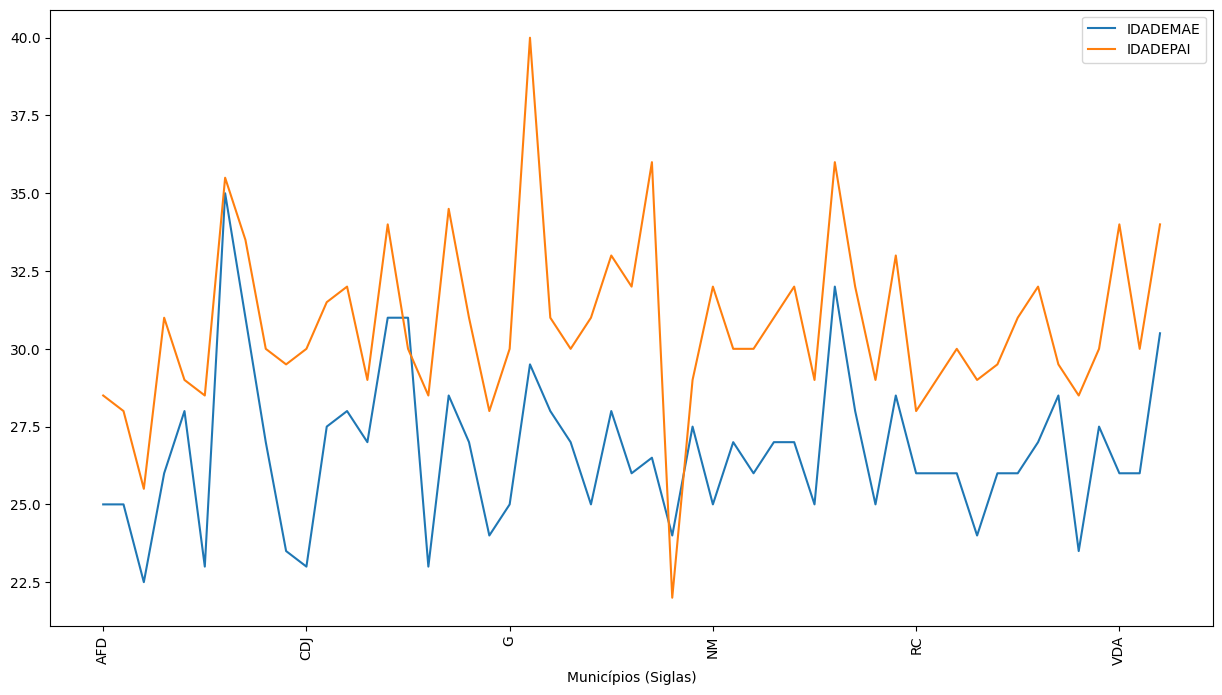

In [15]:
#Eu queria fazer um plot para visualização, mas quando fiz isso a coluna 'munResNome' ficou poluindo demais com suas variaveis gigantes, Então eu procurei uma função para aprender como deixar
#tudo em sigla, para ao menos ter o nome da coluna munResNome. ESSE codigo não foi exatamente meu, mas tive interesse de implementar ele para aprender 


def criar_siglas(nome):
    return ''.join([palavra[0] for palavra in nome.split()]).upper()


sinasc_grouped = result_1.groupby('munResNome').mean()
sinasc_grouped.index = sinasc_grouped.index.to_series().apply(criar_siglas)

sinasc_grouped.plot(figsize=[15,8])
plt.xlabel('Municípios (Siglas)')
plt.xticks(rotation=90)  
plt.show()


# se houver outro metodo que não haja necessidade de criar uma função, quando forem corrigir essa tarefa, poderiam me dizer?

### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [16]:
#utilizando o loc para encontrar a data de nascimento  iguais a minha

sinasc_raw_filtrado = sinasc_raw.loc[sinasc_raw['DTNASC'] == '2019/09/26']
sinasc_raw_filtrado.groupby(['SEXO','ESCMAE'])['PESO'].mean()    
#utilizando groupby para juntar as colunas e fazer a media, mas ainda não entendi bem pq o ['PESO'] fica fora e não pode ficar dentro: ('SEXO','ESCMAE','PESO')?

Series([], Name: PESO, dtype: float64)

In [17]:
#utilizando o pd.datetime para fazer a mesma coisa  que o loc mas o que é esse errors = 'coerce'?
#sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'], errors='coerce')

#filtered_data = sinasc_raw[sinasc_raw['DTNASC'].dt.month == 9] 
#filtered_data = filtered_data[filtered_data['DTNASC'].dt.day == 26]

#peso_medio = filtered_data.groupby(['SEXO', 'ESCMAE'])['PESO'].mean()
#peso_medio

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [18]:
sinasc = sinasc_raw[[
    'IDADEMAE', 'SEXO', 'APGAR1', 'APGAR5', 'PESO', 'CONSULTAS', 'DTNASC',
    'GESTACAO', 'GRAVIDEZ', 'ESCMAE', 'IDADEPAI','munResNome'
]].copy()

In [19]:
nascimento_por_municipio = sinasc.groupby('munResNome')['DTNASC'].count()


O município com menos nascimentos é: Município ignorado - RO, com 1 nascimentos.


Text(0, 0.5, 'Quantidade de Nascimentos')

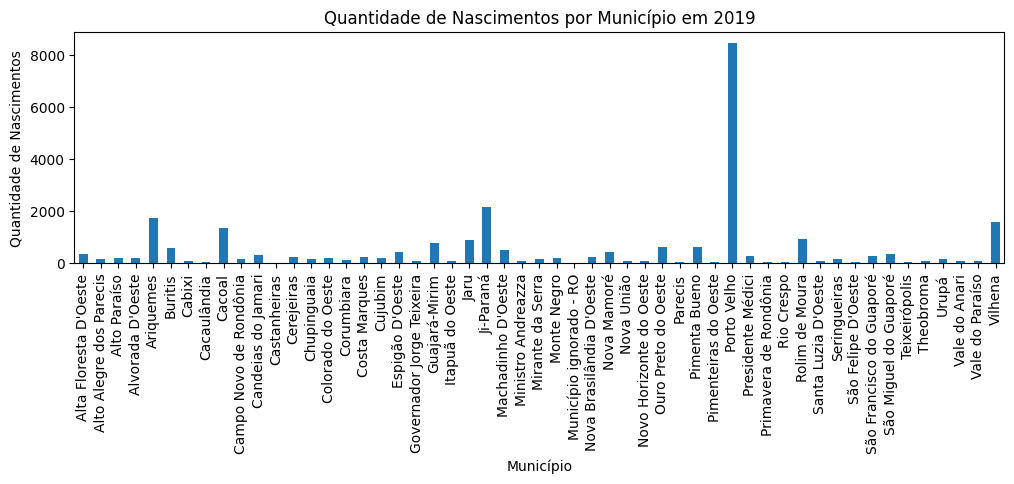

In [20]:
nascimento_por_municipio = sinasc.groupby('munResNome')['DTNASC'].count()

menor_nascimentos = nascimento_por_municipio.min()
municipio_menos_nascimentos = nascimento_por_municipio[nascimento_por_municipio == menor_nascimentos].index[0]



print(f'O município com menos nascimentos é: {municipio_menos_nascimentos}, com {menor_nascimentos} nascimentos.')

nascimento_por_municipio.plot(kind='bar', figsize=(12, 3))

plt.title('Quantidade de Nascimentos por Município em 2019')
plt.xlabel('Município')
plt.ylabel('Quantidade de Nascimentos')




In [21]:
municipio_especifico = 'Porto Velho'
dados_municipio = sinasc_raw[sinasc_raw['munResNome'] == municipio_especifico]

idade_mae = dados_municipio['IDADEMAE'].agg(['mean', 'min', 'max'])

idade_pai = dados_municipio['IDADEPAI'].dropna().agg(['mean', 'min', 'max'])


In [22]:
df_mae = pd.DataFrame(idade_mae)

df_mae

,IDADEMAE
mean,26.31267
min,12.00000
max,47.00000


In [23]:
idade_pai = dados_municipio['IDADEPAI'].dropna().agg(['mean', 'min', 'max'])
df_pai = pd.DataFrame(idade_pai) 
df_pai

,IDADEPAI
mean,32.352679
min,16.000000
max,65.000000


### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [24]:
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'], errors='coerce')

# Filtrar os dados para o mês de março
filtered_data = sinasc_raw[sinasc_raw['DTNASC'].dt.month == 3]

# Agrupar por município e contar o número de nascimentos
nascimentos_de_marco= filtered_data.groupby('munResNome')['DTNASC'].count()
nascimentos_ordenados = nascimentos_de_marco.sort_values(ascending=False)

nascimentos_ordenados.head(5)




munResNome
Porto Velho    744
Ji-Paraná      188
Vilhena        148
Ariquemes      141
Cacoal         133
Name: DTNASC, dtype: int64

Porto Velho foi o município que teve mais nascimentos, com um total de 744 nascimentos.

In [25]:
filhos_vivos= dados_municipio['QTDFILVIVO'].agg(['mean', 'min', 'max'])
filhos_vivos

mean     1.167236
min      0.000000
max     12.000000
Name: QTDFILVIVO, dtype: float64

In [26]:
idade_pai= dados_municipio['IDADEPAI'].agg(['mean', 'min', 'max'])
idade_pai

mean    32.352679
min     16.000000
max     65.000000
Name: IDADEPAI, dtype: float64

In [27]:
idade_mae= dados_municipio['IDADEMAE'].agg(['mean', 'min', 'max'])
idade_mae


mean    26.31267
min     12.00000
max     47.00000
Name: IDADEMAE, dtype: float64

    ### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

Porto Velho foi o município que teve mais nascimentos, com um total de 744 nascimentos.

O município com menos nascimentos foi o  Município ignorado - RO, com 1 nascimentos.

O município com menos nascimentos em 2019 pode indicar uma área com menor densidade populacional ou acesso limitado a serviços de saúde reprodutiva.

 Diferença na Idade dos Pais e Mães, tem uma diferença significativa,podendo ser variados casos para esse ocorrido.

 A escolaridade da mãe influenciou em novos nascimentos, assim como também na IDADEPAI.

 O PAI Sempre é mais velho que a MÃE.
 

A idade minima da mãe foi de supreendentes 12 e dos pais de 16.

A média de filhos vivos por mãe no município com mais nascimentos pode indicar uma tendência local de famílias maiores, o que pode impactar os serviços de saúde e educação.

A Grande parte dos nascimentos acontecidos em porto velho, pode ser resultado de serviços de saúde melhores e infraestrutura.